# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №4 - Метод k-средних, предобработка признаков


###### <hr\>
**Общая информация**

**Срок сдачи:** 25 апреля 2018, 06:00 <br\>
**Штраф за опоздание:** -2 балла после 06:00 25 апреля, -4 баллов после 06:00 2 мая, -6 баллов после 06:00 9 мая

При отправлении ДЗ указывайте фамилию в названии файла<br\>

Используйте данный Ipython Notebook при оформлении домашнего задания.

**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw4.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять написанный код и текст. В противном случае -1 балл
<hr\>

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

%load_ext pycodestyle_magic

The pycodestyle_magic extension is already loaded. To reload it, use:
  %reload_ext pycodestyle_magic


# Имплементация K-means

Пользуясь наработками выше, имплементируйте метод k-means.  
При инициализации необходимо задавать количество кластеров, функцию расстояния между кластерами (для оригинального k-means - евклидово расстояние) и начальное состояние генератора случайных чисел.

После обучения, среди атрибутов класса `Kmeans` должны появится
* Метки кластеров для объектов
* Координаты центройдов кластеров

k-means - это алгоритм **кластеризации**, а не классификации, а посему метод `.predict()` в нем фактически не нужен, но он может возвращать метки ближайшего кластера для объектов.

###### Задание 1 (2 баллов)
Имплементируйте метод k-means. Задание считается выполненным, если Ваша реализация работает быстрее реализации из sklearn.

Теория для выполнения задания 2 и 3 остаётся на самостоятельное изучение. Теории немного и она совсем простая.

###### Задание 2 (2 балла)
Имплементируйте класс MiniBatchKMeans, который является классом наследником Kmeans.

###### Задание 3 (2 балла)
Превратите k-means в k-means++. Для этого нужно реализовать метод в классе Kmeans, который будет инициализировать более "хорошие" значения центроидов. Чтобы использовался метод k-means++, в параметр init необходимо передать строковое значение 'k-means' (по умолчанию 'random').

###### Задание 4 (2 балла)
В пункте "Проверка корректности метода" нужно нарисовать графики, которые показывают зависимость времени выполнения алгоритма от количества сэмплов. Графики должны быть  нарисованы для различных комбинаций реализаций алгоритма (k-means, k-means++, k-means с MiniBatchKMeans, k-means++ с MiniBatchKMeans). График достаточно построить на 5-10 точках.

###### Задание 5 (2 балла)
В пункте "Применение K-means на реальных данных" нужно сравнить различные реализации k-means (k-means, k-means++, k-means с MiniBatchKMeans, k-means++ с MiniBatchKMeans). После чего написать вывод, в котором должно быть объяснение того, почему один алгоритм оказался лучше остальных или почему не было выявлено лучшего алгоритма.

In [462]:
#%%pycodestyle

class MyKmeans:

    def __init__(self, k=2, metric='euclidean', max_iter=1000, random_state=None, init='random', alpha = 0.001):
        """
        Инициализация метода
        :k - количество кластеров
        :metric - функция расстояния между объектами
        :max_iter - максиальное количество итераций
        :random_state - seed для инициализации генератора случайных чисел
        """

        self.k = k
        self.random_state = random_state
        self.metric = metric
        self.max_iter = max_iter
        self.init = init
        self.alpha = alpha

    def init_centroid(self, X, y=None):
        if self.init == 'random':
            self.centroid = X[np.random.choice(np.shape(X)[0], size=self.k, replace=False)]
            return
        elif self.init == 'k-means':
            self.centroid[0] = X[np.random.randint(0,X.shape[0])]

            for i in range(1, self.k):
                dist = (np.square((X[np.newaxis, :] - self.centroid[:i, np.newaxis]))).sum(axis=2)

                Dsq = np.min(dist, axis=0)
                D_sum_sq = np.sum(Dsq, axis=0)

                probs = Dsq/D_sum_sq

                self.centroid[i] = X[np.random.choice(X.shape[0], size=1, replace=False, p=probs)]
            return
        
    def fit(self, X, y=None):
        """
        Процедура обучения k-means
        """

        # Инициализация генератора случайных чисел
        np.random.seed(self.random_state)

        # Массив с метками кластеров для каждого объекта из X
        self.labels = np.empty(X.shape[0])

        # Массив с центройдами кластеров
        self.centroid = np.empty((self.k, X.shape[1]))

        # Your Code Here
        self.init_centroid(X, y)
        L = -10
        for i in range(self.max_iter):
            dist = ((X - self.centroid[0]) ** 2).sum(axis=1)
            self.labels = np.zeros(X.shape[0])
            for j in range(self.k - 1):
                distj = ((X - self.centroid[j+1]) ** 2).sum(axis=1)
                mask = dist > distj
                dist[mask] = distj[mask]
                self.labels[mask] = j + 1
            for j in range(self.k):
                mask = self.labels == j
                self.centroid[j] = X[mask].sum(axis=0) / mask.sum()
            S = dist.sum()
            if(abs(L - S) < self.alpha):
                return self
            else:
                L = S

        return self

    def predict(self, X, y=None):
        """
        Процедура предсказания кластера
        Возвращает метку ближайшего кластера для каждого объекта
        """

        return self.labels


class MiniBatchKMeans(MyKmeans):
    
    def __init__(self, k=2, metric='euclidean', max_iter=100, random_state=None, init='random', batch_size=100, alpha=0.001):

        MyKmeans.__init__(self, k, metric, max_iter, random_state, init, alpha)
        self.batch_size = batch_size
    
    def fit(self, X_, y = None):
        
        X = X_
        
        np.random.seed(self.random_state)
        
        self.centroid = np.empty((self.k, X.shape[1]))
        
        self.init_centroid(X, y)
        
        for i in range(self.max_iter):
            np.random.shuffle(X)
            B = X[:self.batch_size]
            dist = ((B - self.centroid[0]) ** 2).sum(axis=1)
            labels = np.zeros(B.shape[0])
            for j in range(self.k - 1):
                distj = ((B - self.centroid[j+1]) ** 2).sum(axis=1)
                mask = dist > distj
                dist[mask] = distj[mask]
                labels[mask] = j + 1
            for j in range(self.k):
                mask = labels == j
                mask_s = mask.sum()
                if(mask_s == 0):
                    continue
                C_ = B[mask].sum(axis=0) / mask.sum()
                self.centroid[j] = (1 - 1 / (i + 1)) * self.centroid[j] + 1 / (i + 1) * C_ 

        return self
    
    def predict(self, X, y = None):
        
        dist = ((X - self.centroid[0]) ** 2).sum(axis=1)
        self.labels = np.zeros(X.shape[0])
        for j in range(self.k - 1):
            distj = ((X - self.centroid[j+1]) ** 2).sum(axis=1)
            mask = dist > distj
            dist[mask] = distj[mask]
            self.labels[mask] = j + 1
            
        return self.labels

### Проверка корректности метода

Перед тем как применять алгоритм на реальных данных, нужно испытать его на простых "игрушечных" данных.

Если алгоритм реализован правильно, то метод должен идеально разбивать на 3 кластера данные ниже. Проверьте это.

ВНИМАНИЕ! Проверка должна быть осуществлена на всех реализациях, иначе реализация не будет зачтена!

In [455]:
from sklearn.datasets import make_blobs

In [456]:
X, y = make_blobs(n_samples=100, n_features=2, centers=3, cluster_std=1, 
           center_box=(-10.0, 10.0), shuffle=False, random_state=1234)

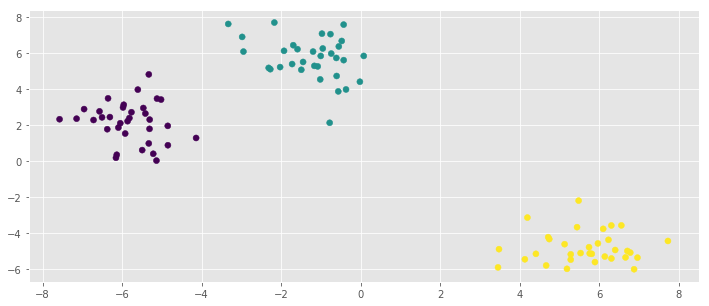

In [457]:
plt.scatter(X[:,0], X[:, 1], c=y)

Проверьте Вашу имплементацию на простых данных (без этого пункта ДЗ не считается выполненным).   
КОММЕНТАРИИ НЕ СТИРАТЬ!

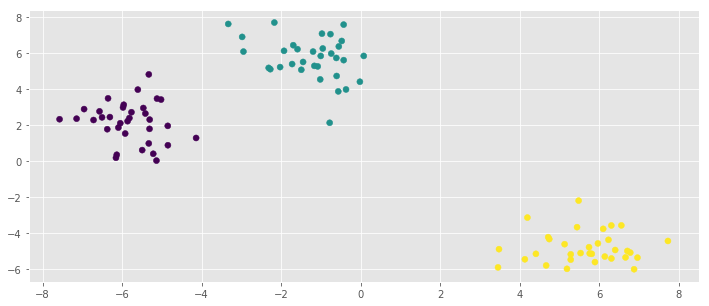

In [458]:
## Работоспособность MyKmeans
clf = MyKmeans(k=3, random_state=13, init = "random")
clf.fit(X)
Y = clf.predict(X)
plt.scatter(X[:,0], X[:, 1], c=Y)

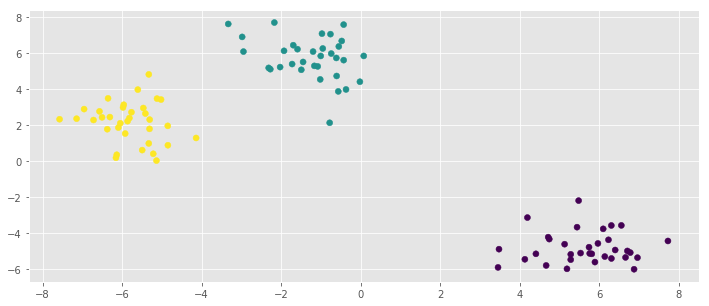

In [459]:
## Работоспособность MyKmeans++
clf = MyKmeans(k=3, random_state=13, init = "k-means")
clf.fit(X)
Y = clf.predict(X)
plt.scatter(X[:,0], X[:, 1], c=Y)

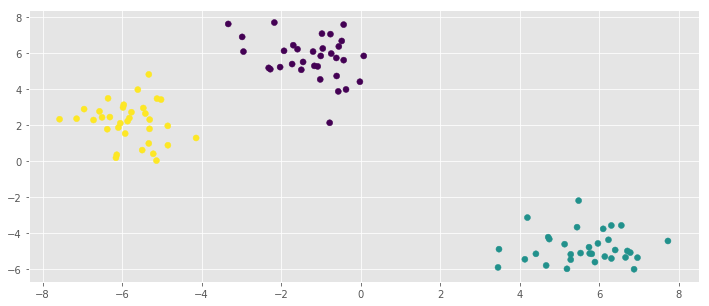

In [463]:
## Работоспособность MyKmeans с MiniBatchMyKmeans
clf = MiniBatchKMeans(k = 3, max_iter = 1000, random_state = 13, init="random")
clf.fit(X)
Y = clf.predict(X)
plt.scatter(X[:,0], X[:, 1], c=Y)

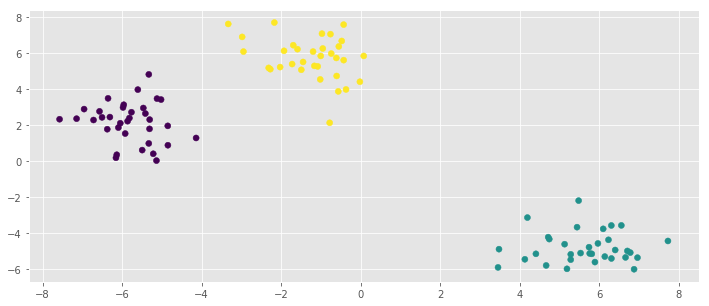

In [464]:
## Работоспособность MyKmeans++ с MiniBatchMyKmeans
clf = MiniBatchKMeans(k = 3, max_iter = 1000, random_state = 13, init = "k-means")
clf.fit(X)
Y = clf.predict(X)
plt.scatter(X[:,0], X[:, 1], c=Y)

In [465]:
import time

def test(clf):
    iterations = 10
    points = np.array([100, 500, 1000, 2500, 5000, 15000])
    X, y = make_blobs(n_samples=n_samples[-1], n_features=2, centers=3, cluster_std=1, 
           center_box=(-10.0, 10.0), shuffle=False, random_state=1234)
    T_clf = np.empty((iterations, np.shape(points)[0]))

    for j in range(np.shape(points)[0]):
        x_test = X[np.random.choice(points[-1], points[j], replace=False)]
        for i in range(iterations):
            start = time.time()
            clf.fit(x_test)
            end = time.time()
            T_clf[i, j] = end - start

    T_clf = np.mean(T_clf, axis=0)
    plt.plot(points, T_clf)
    plt.scatter(points, T_clf, s=100)

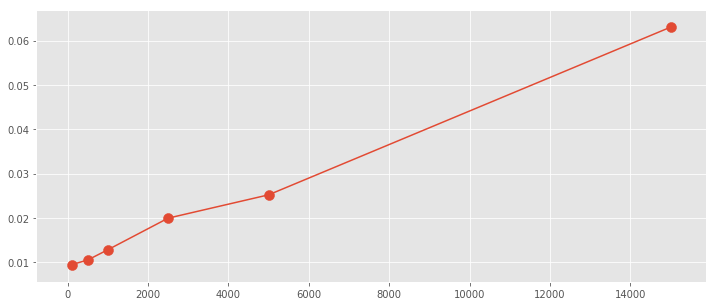

In [466]:
## Время выполнения алгоритма Kmeans из sklearn
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, max_iter=1000, random_state=13, init='random')
test(kmeans)

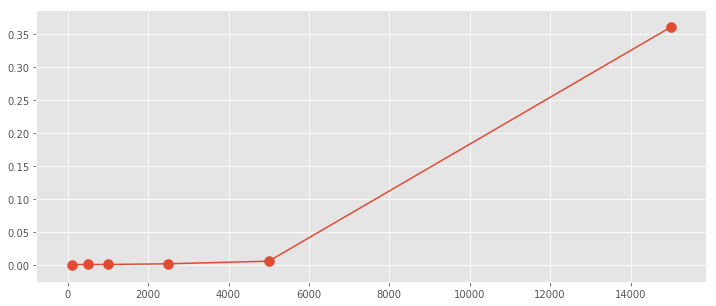

In [467]:
## Время выполнения алгоритма MyKmeans
clf = MyKmeans(k = 3, random_state = 13, max_iter = 1000, init = "random")
test(clf)

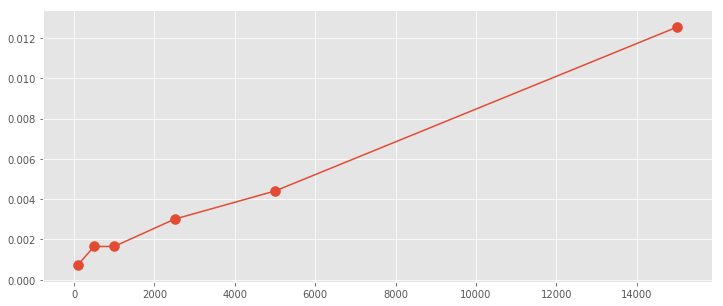

In [468]:
## Время выполнения алгоритма MyKmeans++
clf = MyKmeans(k = 3, random_state = 13, max_iter = 1000, init = "k-means")
test(clf)

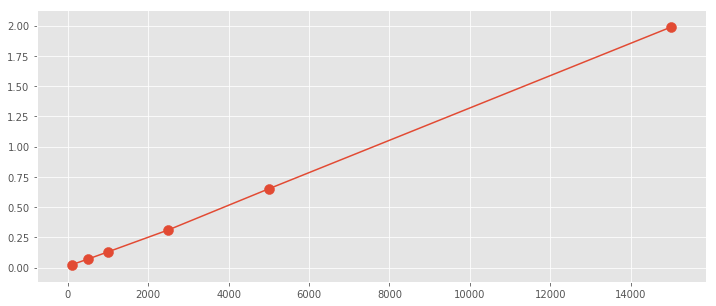

In [469]:
## Время выполнения алгоритма MyKmeans с MiniBatchMyKmeans
clf = MiniBatchKMeans(k = 3, random_state = 13, init = "random")
test(clf)

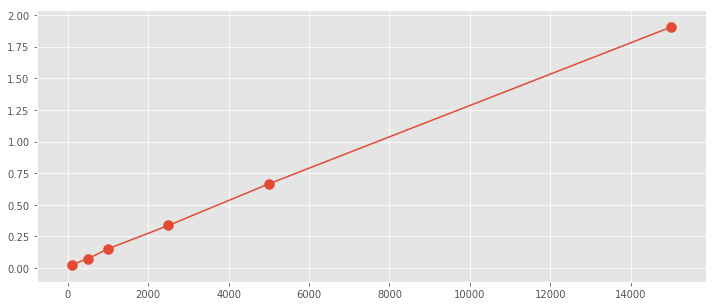

In [470]:
## Время выполнения алгоритма  MyKmeans++ с MiniBatchMyKmeans
clf = MiniBatchKMeans(k = 3, random_state = 13, init = "k-means")
test(clf)

# Применение K-means на реальных данных

Загрузите [данные](https://github.com/brenden17/sklearnlab/blob/master/facebook/snsdata.csv) в которых содержится описание интересов профилей учеников старшей школы США.  (без этого пункта задание не считается выполненным).   
ВНИМАНИЕ! Проверка должна быть осуществлена на всех реализациях, иначе реализация не будет зачтена!

In [471]:
df_sns = pd.read_csv('snsdata.csv', sep=',')
df_sns.head()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,NaN,18.995,10,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


Данные устроены так: 
* Год выпуска
* Пол
* Возраст
* Количество друзей
* 36 ключевых слов, которые встречаются в профилe facebook (интересы, сообщества, встречи)

* Удалите все признаки кроме 36 ключевых слов.
* Нормализуйте данные - из каждого столбца вычтите его среднее значение и поделите на стандартное отклонение.
* Используйте метод k-means чтобы выделить 9 кластеров
* Попробуйте проинтерпретировать каждый кластер проанализировав полученные центройды (Некоторые кластеры могут быть очень большие и очень маленькие - плохо интерпретируются)   
КОММЕНТАРИИ НЕ СТИРАТЬ!

In [472]:
df_sns = df_sns.drop(['gradyear', 'gender', 'age', 'friends'], 1)
keywords = np.array(df_sns.columns)

X = df_sns.iloc[:, :].values
X = X - X.mean(axis=0)
X = X / X.std(axis=0)

df_sns.head()

,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


Centroid #1


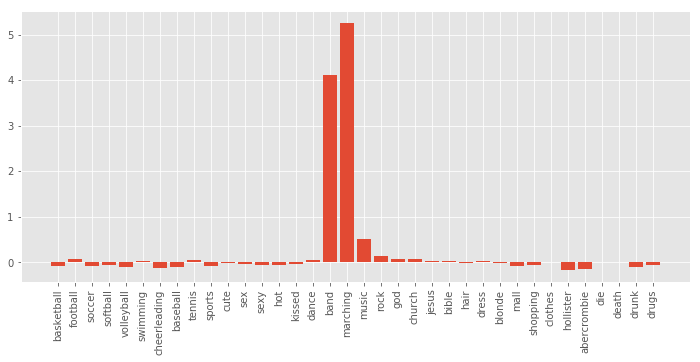

Centroid #2


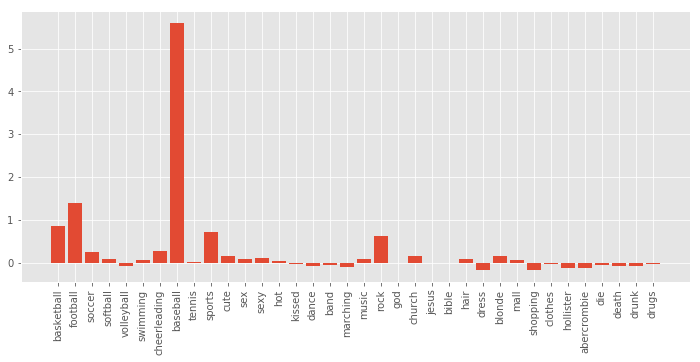

Centroid #3


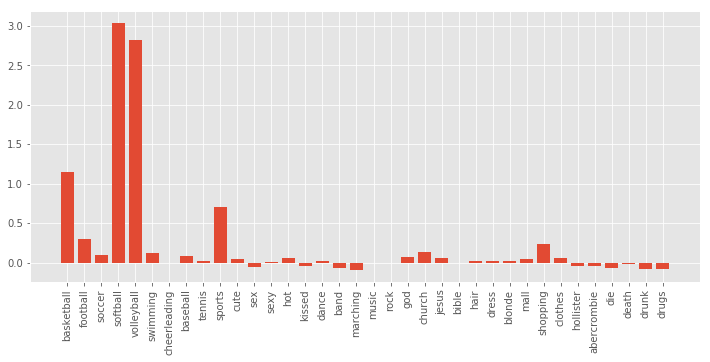

Centroid #4


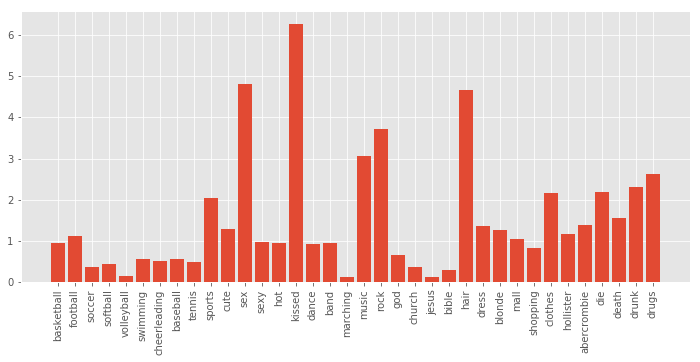

Centroid #5


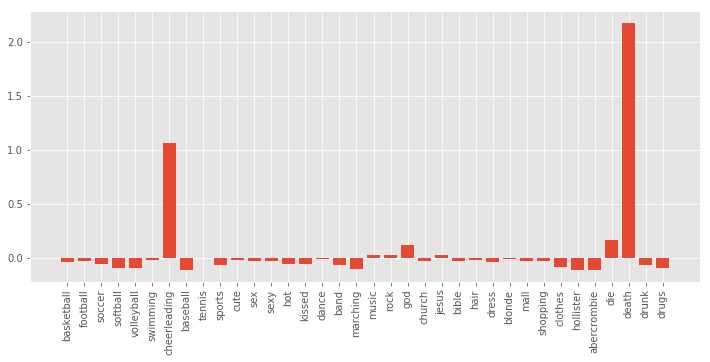

Centroid #6


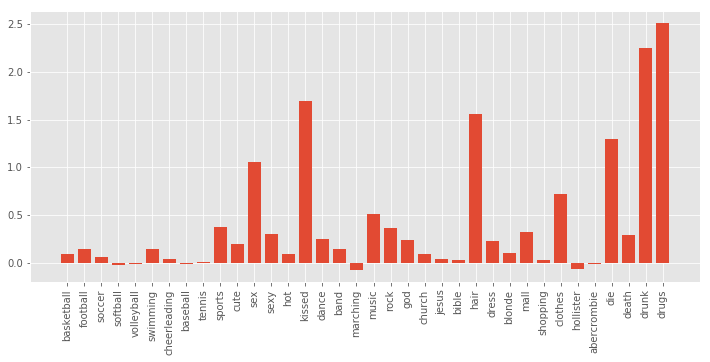

Centroid #7


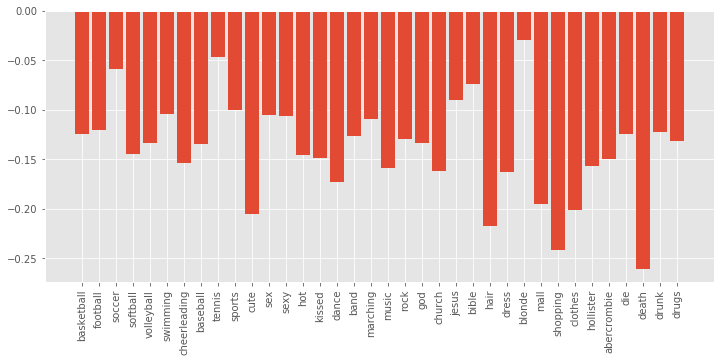

Centroid #8


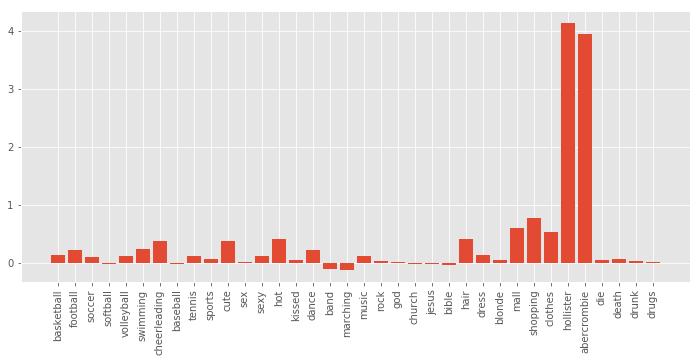

Centroid #9


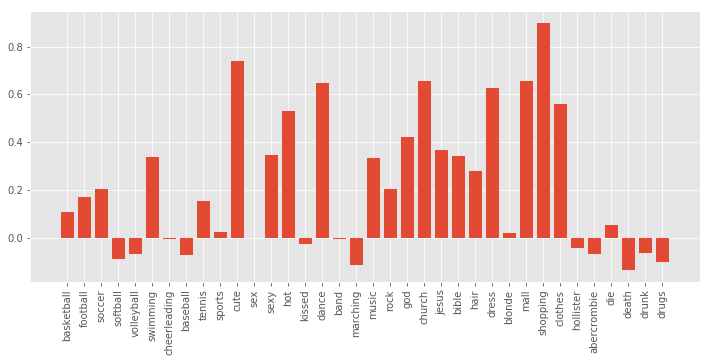

In [473]:
## MyKMeans
clf = MyKmeans(k = 9)
clf.fit(X)
centroids_kmeans = clf.centroid
for i in range(9):
    print("Centroid #" + str(i + 1))
    plt.bar(range(36), centroids_kmeans[i])
    plt.xticks(range(36), keywords, rotation=90)
    plt.show()

Centroid #1


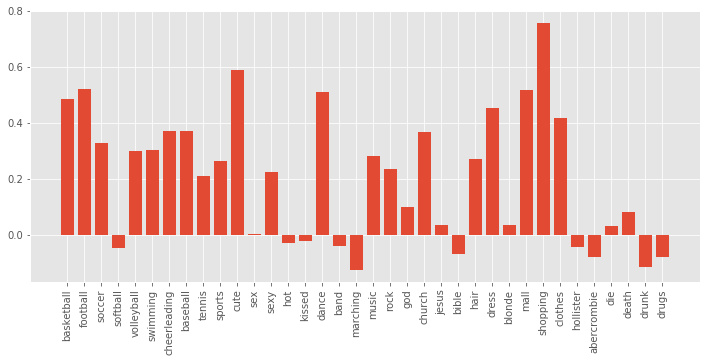

Centroid #2


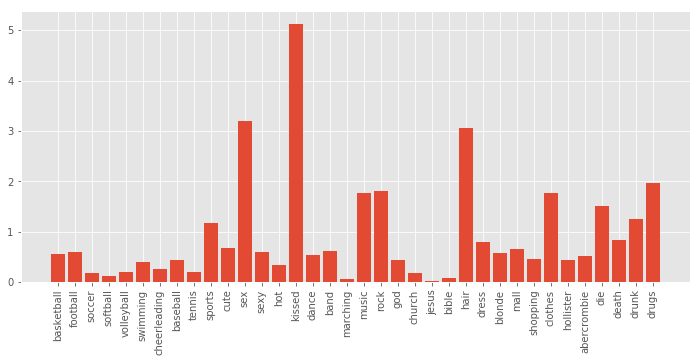

Centroid #3


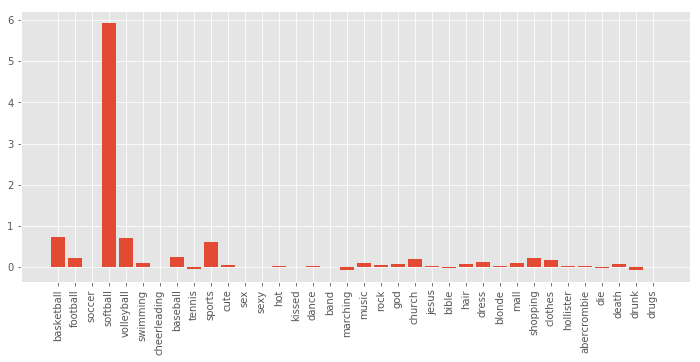

Centroid #4


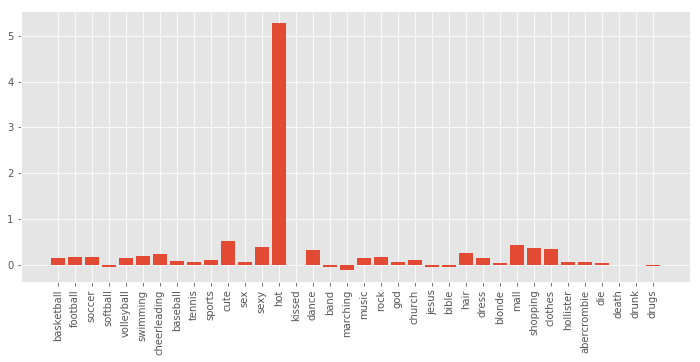

Centroid #5


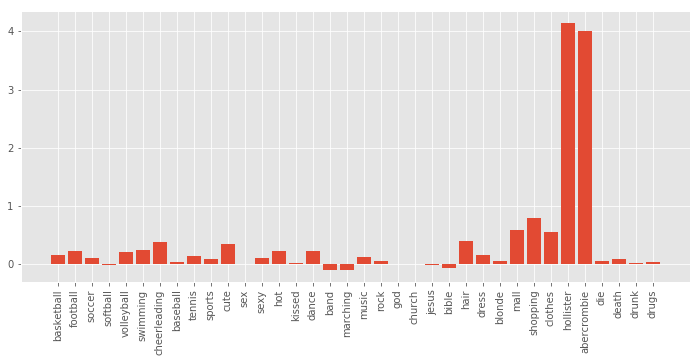

Centroid #6


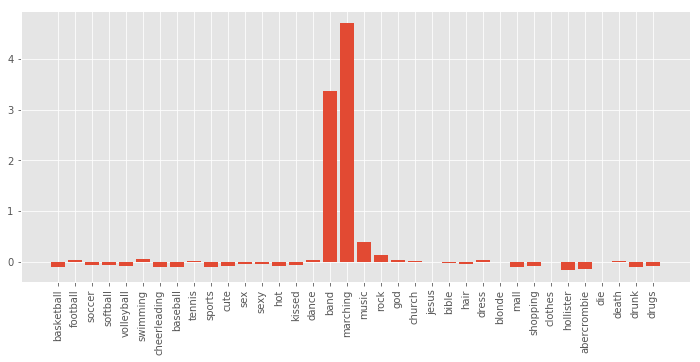

Centroid #7


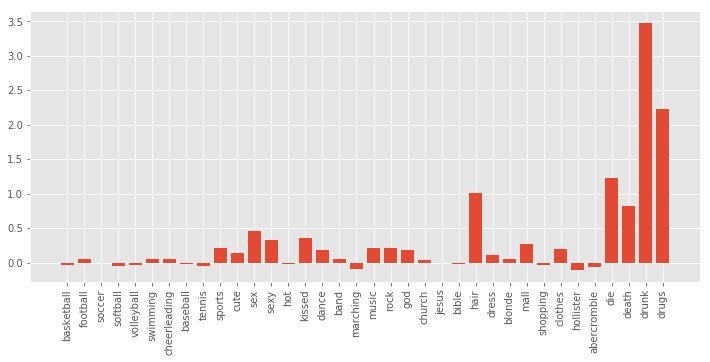

Centroid #8


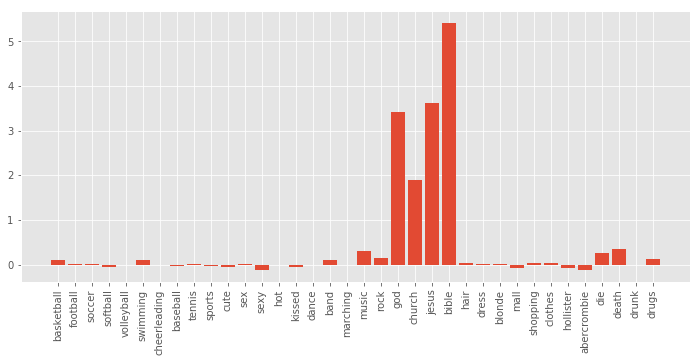

Centroid #9


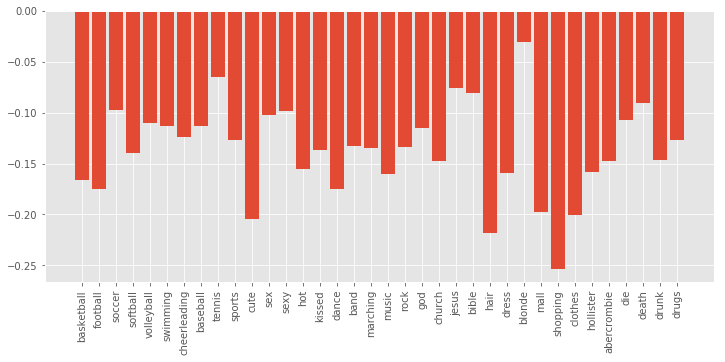

In [474]:
## MyKMeans++
clf = MyKmeans(k=9, init='k-means')

clf.fit(X)
centroids_kmeans_p = clf.centroid
for i in range(9):
    print("Centroid #" + str(i + 1))
    plt.bar(range(36), centroids_kmeans_p[i])
    plt.xticks(range(36), keywords, rotation=90)
    plt.show()

Centroid #1


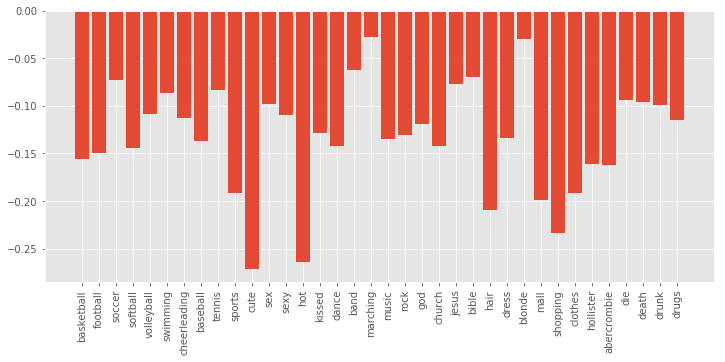

Centroid #2


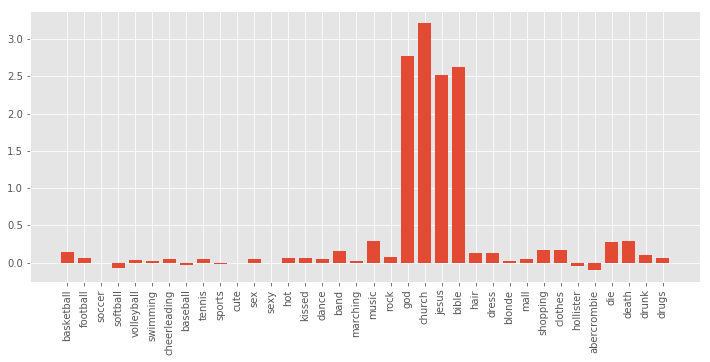

Centroid #3


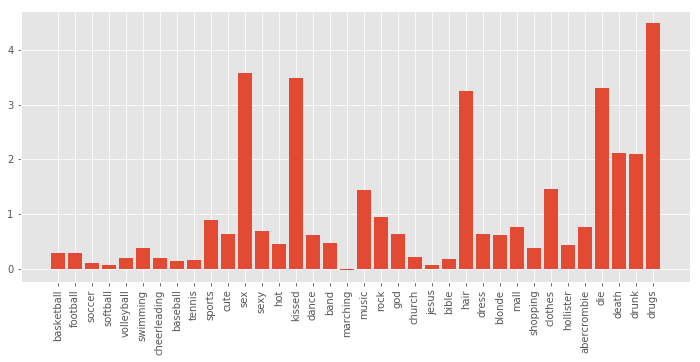

Centroid #4


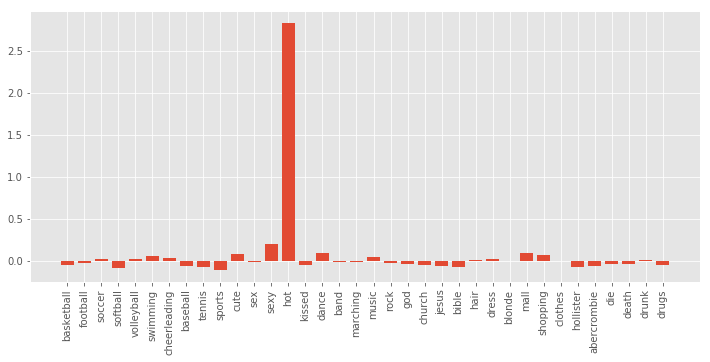

Centroid #5


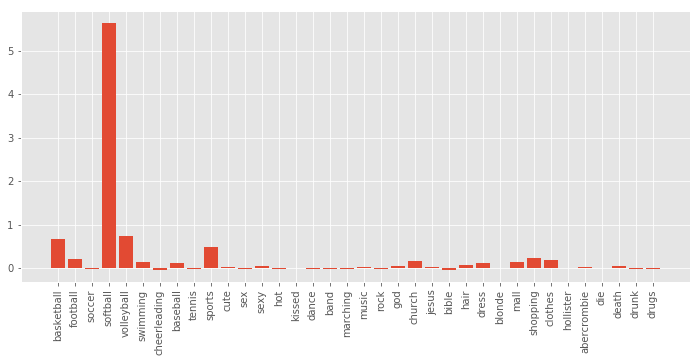

Centroid #6


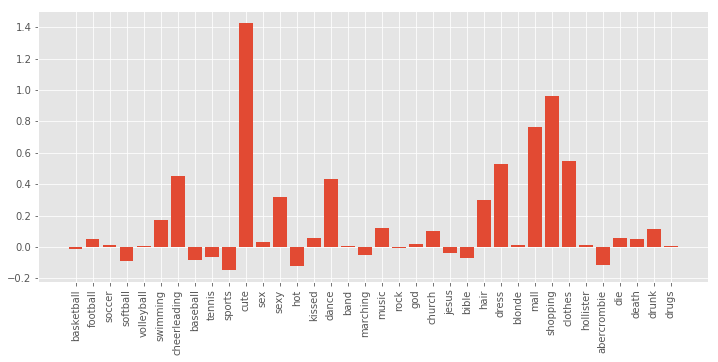

Centroid #7


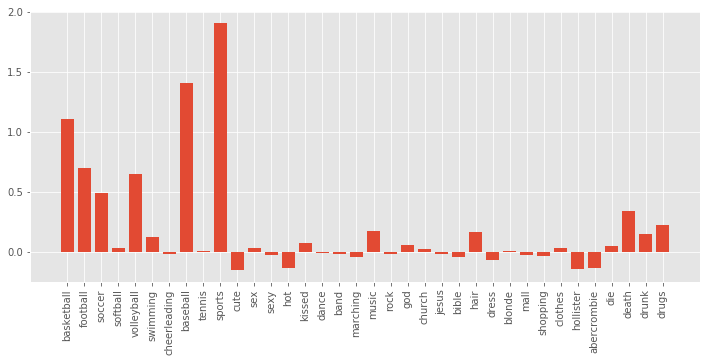

Centroid #8


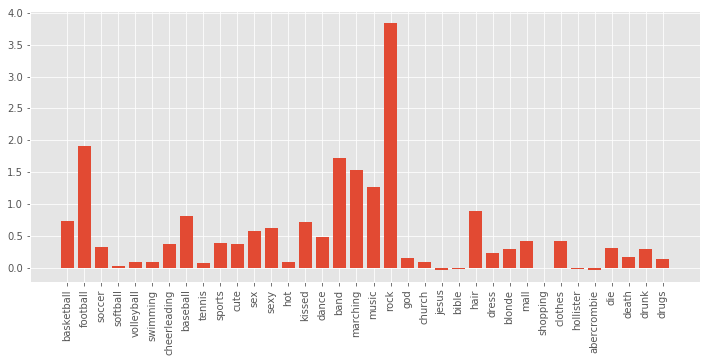

Centroid #9


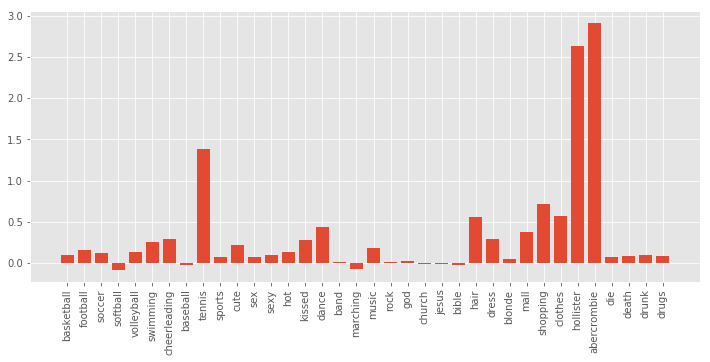

In [475]:
## MyKMeans с MiniBatchMyKMeans
clf = MiniBatchKMeans(k=9, batch_size=1000)

clf.fit(X)
centroids_MiniBatchKmeans = clf.centroid
for i in range(9):
    print("Centroid #" + str(i + 1))
    plt.bar(range(36), centroids_MiniBatchKmeans[i])
    plt.xticks(range(36), keywords, rotation=90)
    plt.show()

Centroid #1


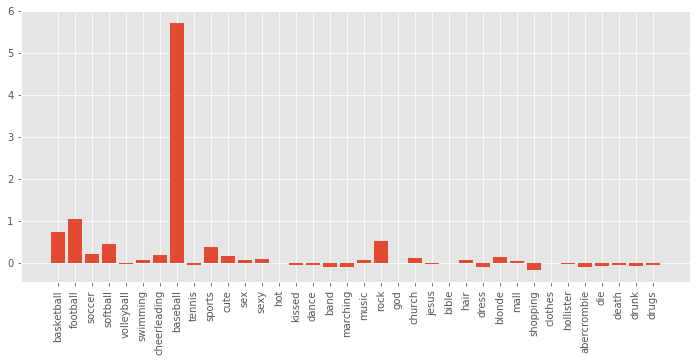

Centroid #2


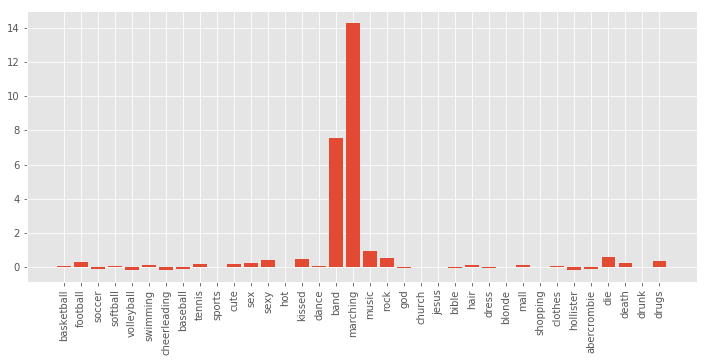

Centroid #3


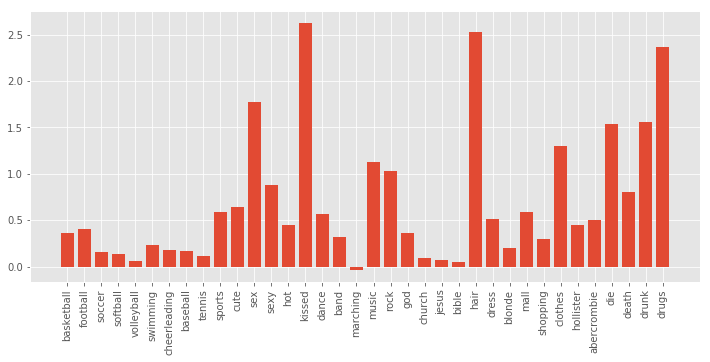

Centroid #4


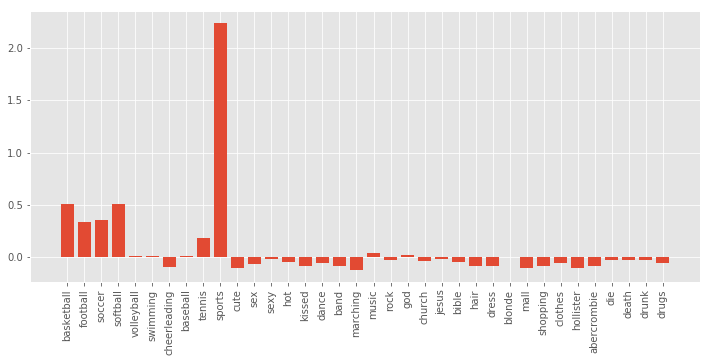

Centroid #5


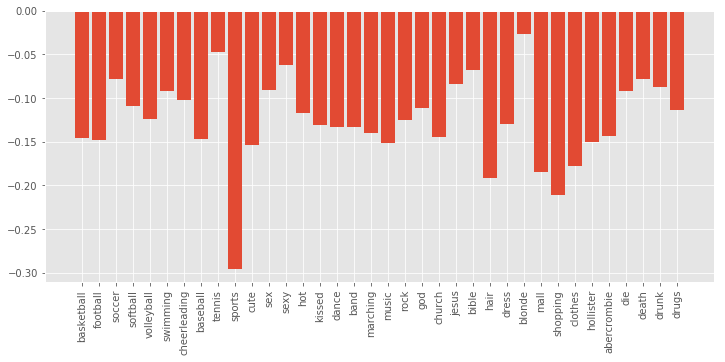

Centroid #6


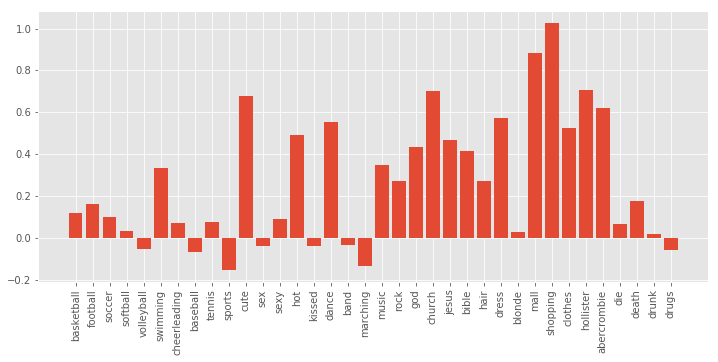

Centroid #7


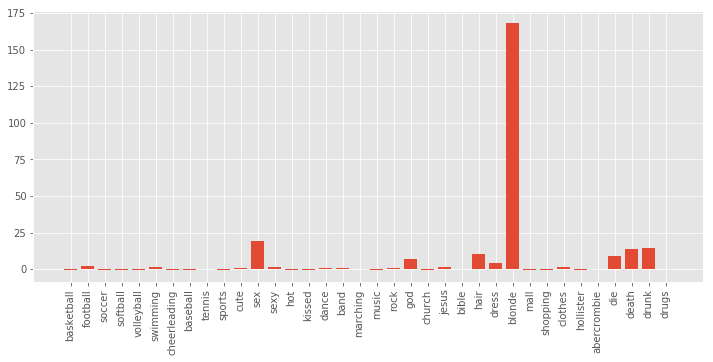

Centroid #8


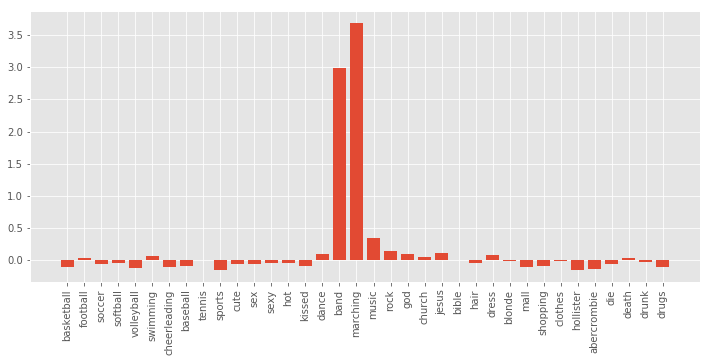

Centroid #9


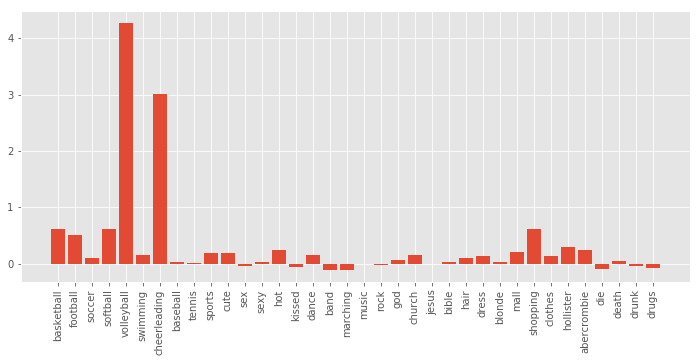

In [476]:
## MyKMeans++ с MiniBatchMyKMeans
clf = MiniBatchKMeans(k=9, init='k-means', batch_size=1000)

clf.fit(X)
centroids_MiniBatchKmeans_p = clf.centroid
for i in range(9):
    print("Centroid #" + str(i + 1))
    plt.bar(range(36), centroids_MiniBatchKmeans_p[i])
    plt.xticks(range(36), keywords, rotation=90)
    plt.show()

## Вывод
Исходя из полученных графиков сложно определить какой метод лучше, но все же в MyKMeans++ 5 класстеров четко выресовываются и их скорее всего можно интерпритировать в отличии от остальных методов, где только 4 класстера хорошо интерпретируемы. Так могло получиться из-за преимущества kmeans++ над kmeans, это связанно с хорошими начальными значениями, и из-за большей точности k-means по сравнению с MiniBatchKMeans.